In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('../DATA/rock_density_xray.csv')
df.head(10)
df.tail(10)
df.isnull().sum()
df.columns = ['Signal', 'Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

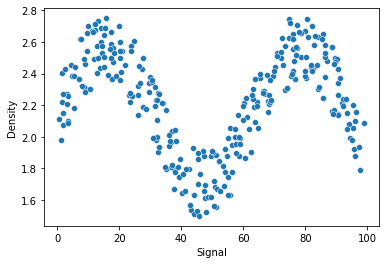

In [28]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [29]:
# Defining X and y and splitting the data into training and test data
X = df['Signal'].values.reshape(-1,1)
y = df['Density']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

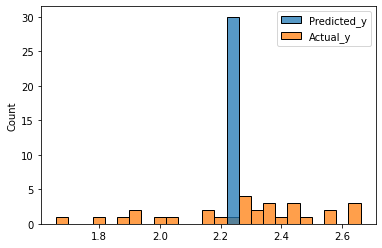

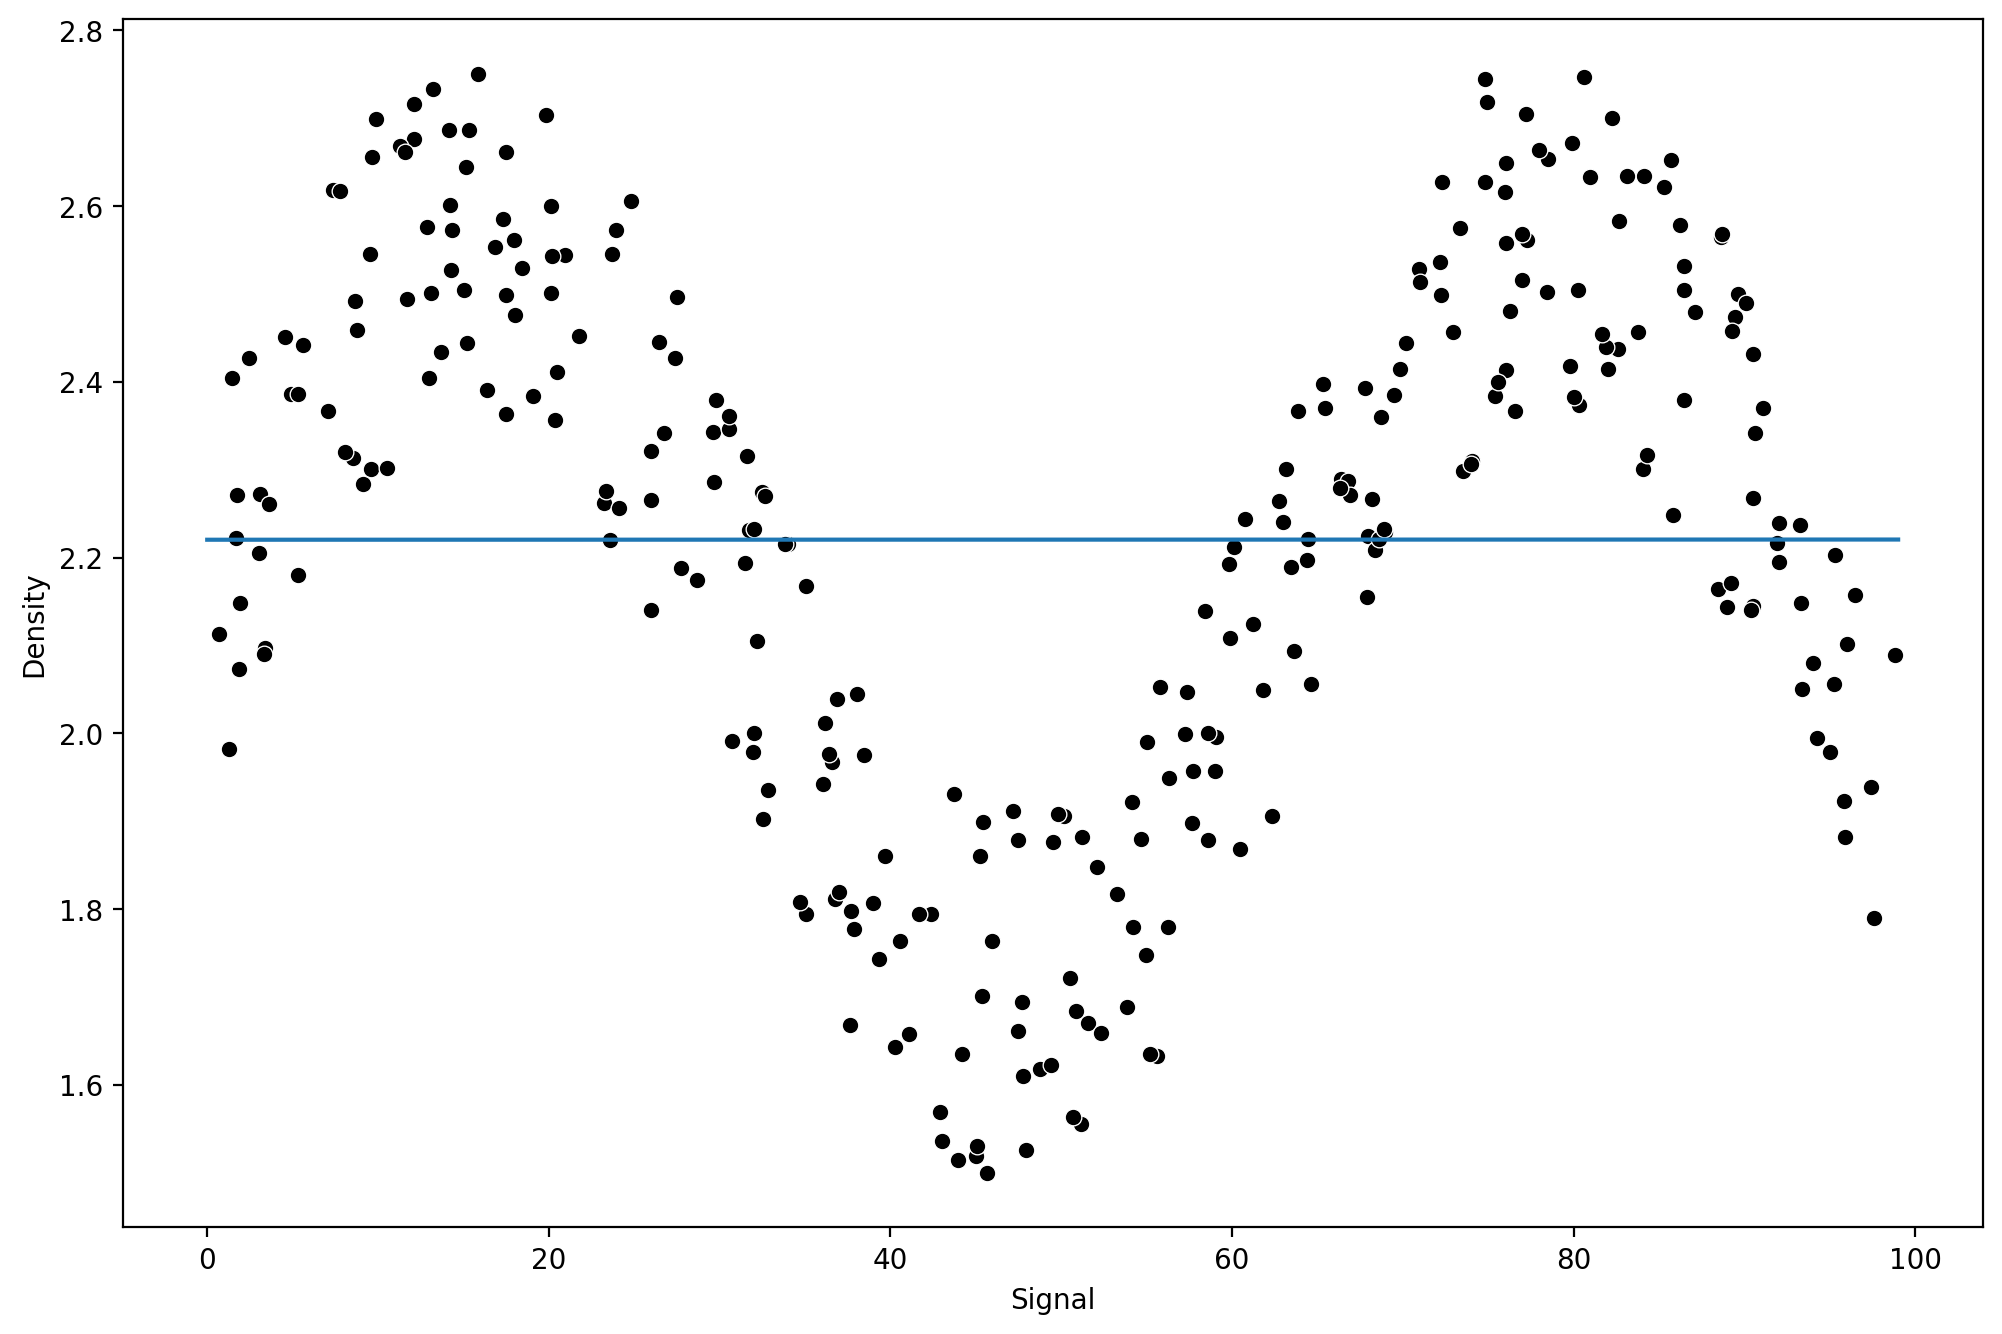

In [31]:
# Starting with linear regression 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model_prediction = lr_model.predict(X_test)


from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, lr_model_prediction))
# The output is 0.2570051996584629

comparision_data = {'Predicted_y': lr_model_prediction, 'Actual_y': y_test}
comparison_df = pd.DataFrame(comparision_data)
sns.histplot(comparison_df)

# Conclusion: The above histogram plot shows that there is huge difference between actual y and predicted y. 
# Thus, linear regression is not a good model though the root_mean_squared_error is a comparatively small value
# and does not give much insight

# We can also do a scatter plot of the prediction. However, we cannot plot X and lr_model_prediction 
# since X is of dimension (100,1) and lr_model_prediction is of dimension (30,1). However,by observing X, we notice that
# the values range between 0 and 100. So, let's create a variable consisiting of values between 0 and 100 and
# another variable that makes prediction using it and plot them as followw. This would closely mimic 
# the given X and prediction model 

signal = np.arange(0,100)
output = lr_model.predict(signal.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal,output)

# The 2nd plot shows why a linear regression will not work

In [32]:
# Starting with multiple regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


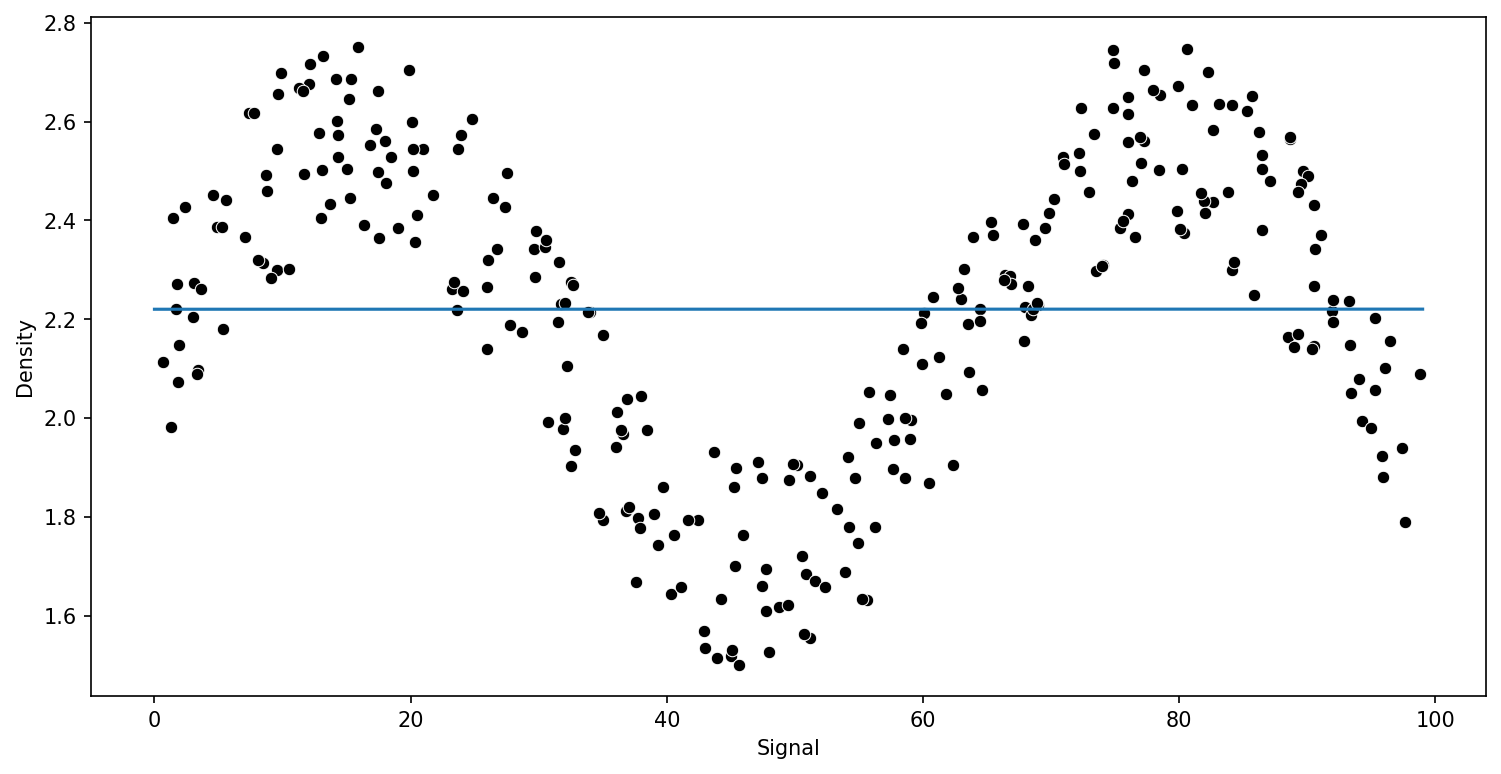

In [33]:
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.28173095637255463


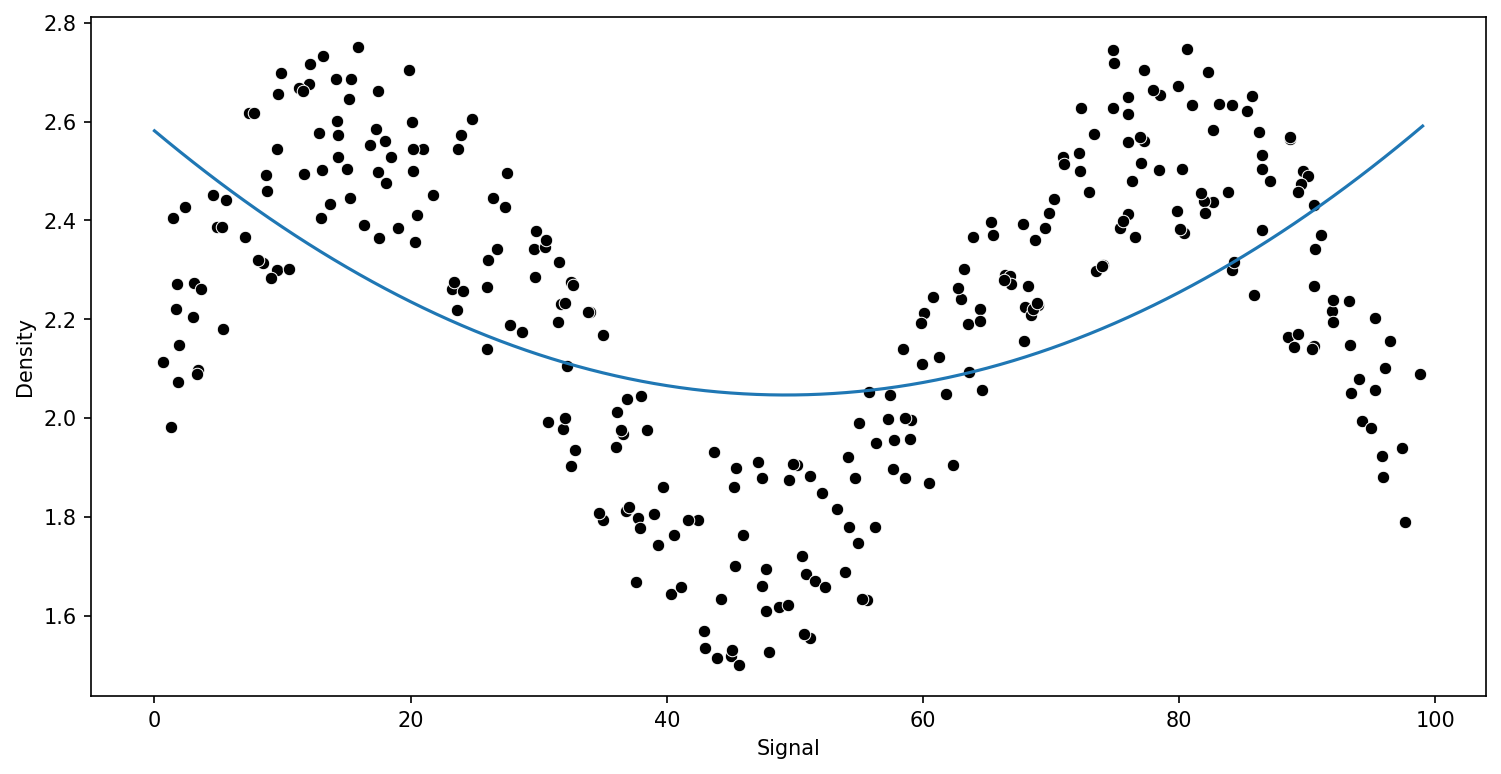

In [34]:
# Pipeline for polynomials

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# A 2nd order polynomial
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14588633387775765


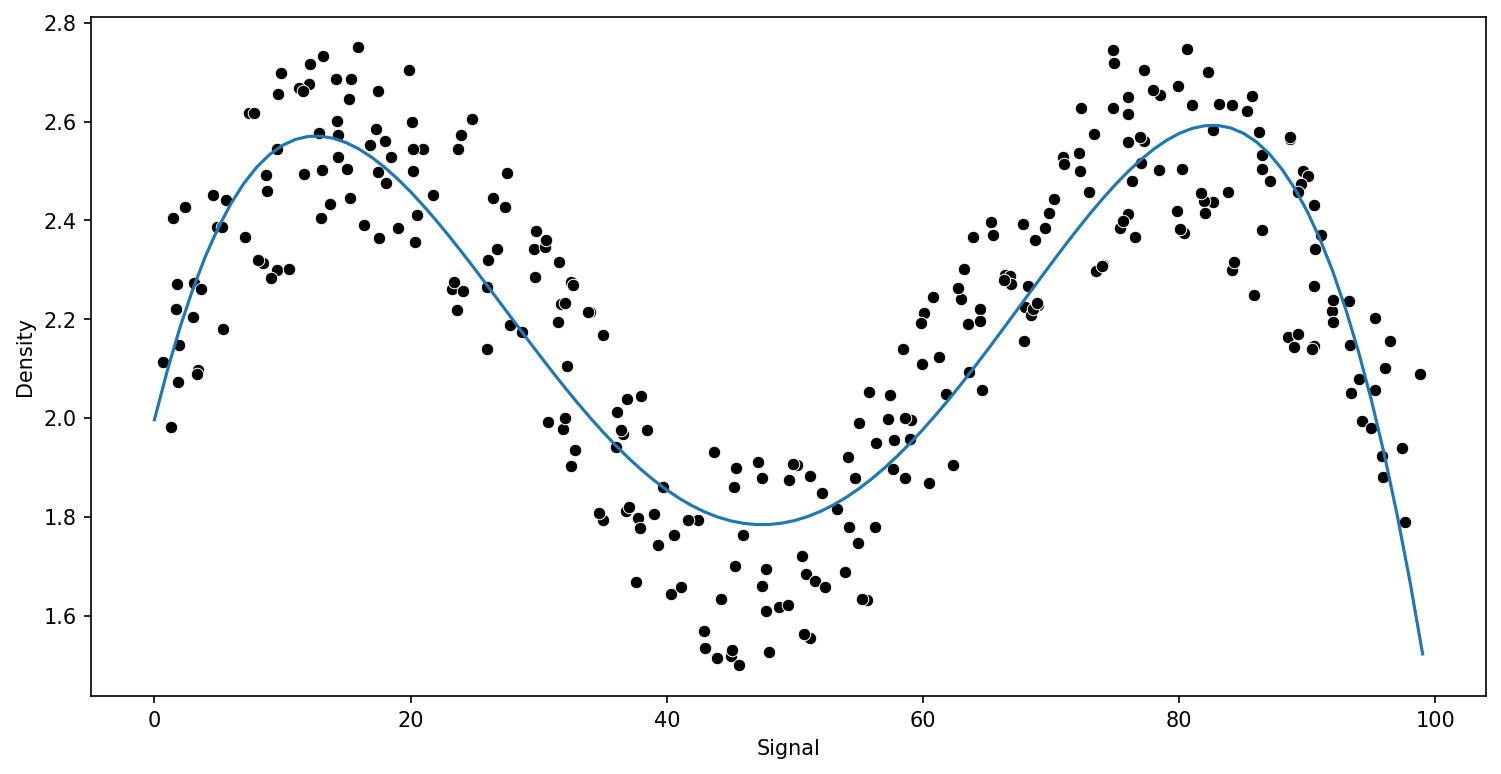

In [35]:
# A 4 order polynomial:
pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14034544477139238


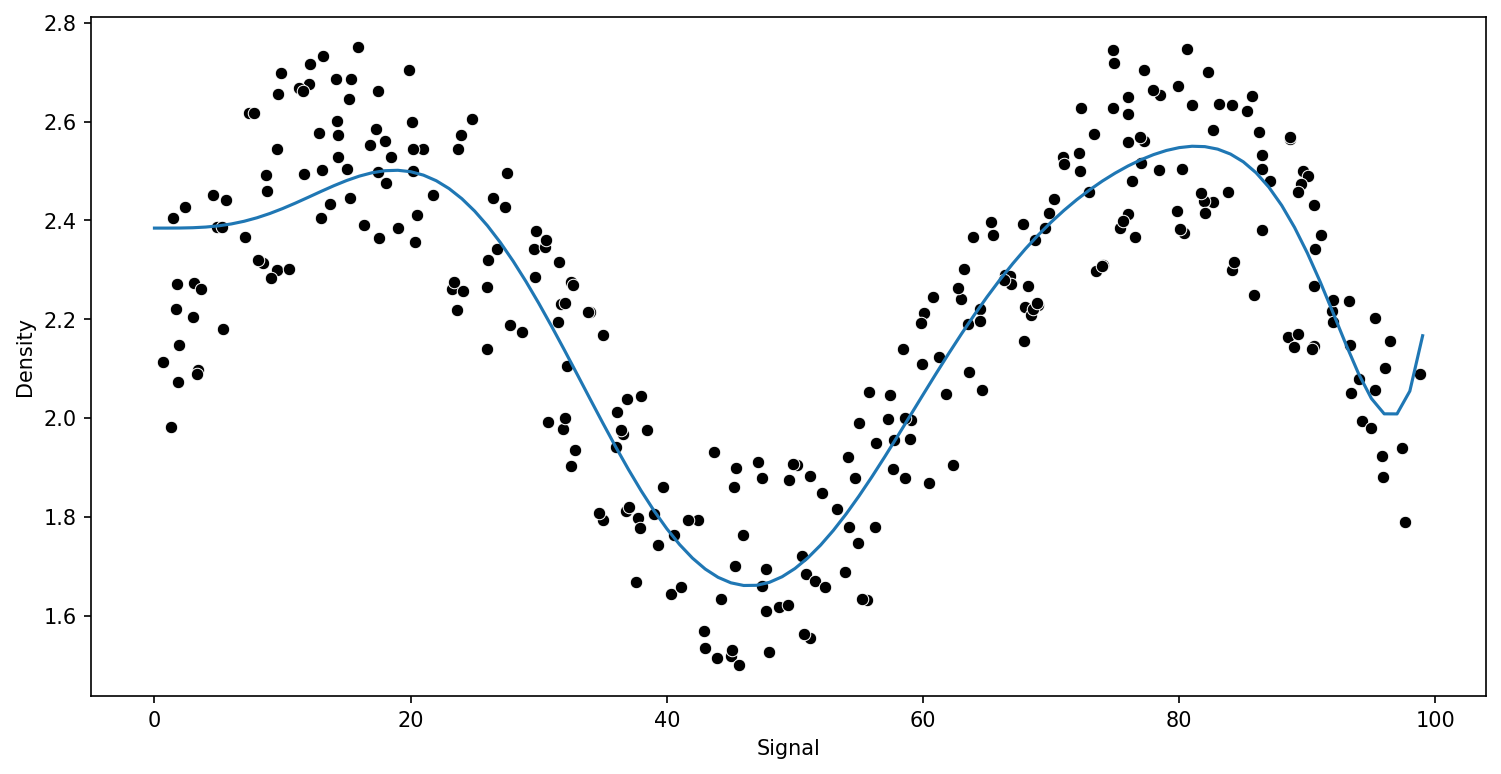

In [36]:
# A 10 order poly
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [ ]:
# Conclusion -- both 4th and 10th order fits well with 10th order having a much smaller RMSE